# Bank Customer Churn Model

Importing Libraries

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [3]:
path = 'C:\Data Science Datasets'
os.chdir(path)

In [4]:
bank = pd.read_csv('bank.csv')
data = bank.copy() ## Copying the Data
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


# Data Analysis

In [7]:
data.shape

(4521, 17)

In [8]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [11]:
data.isnull().sum()
print("There is no NaN values in our given Data")

There is no NaN values in our given Data


In [12]:
data['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

<AxesSubplot: xlabel='job', ylabel='count'>

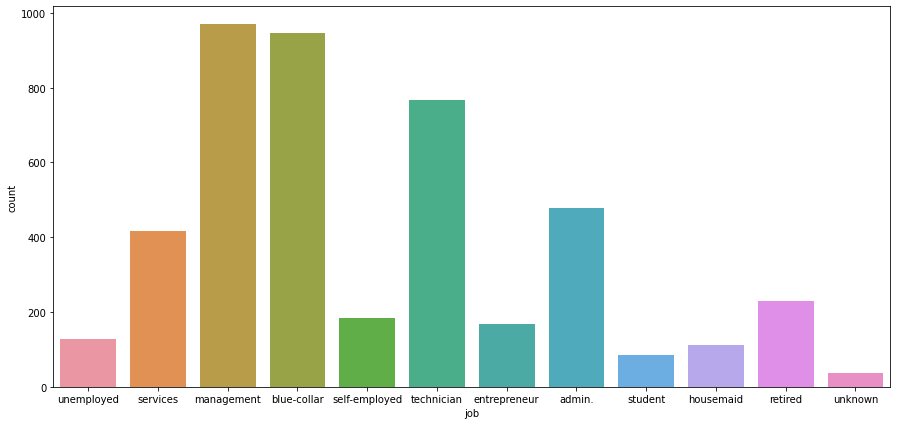

In [13]:
plt.figure(figsize = (15,7))
sns.countplot(x = data['job'])

In [14]:
data['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

<AxesSubplot: xlabel='marital', ylabel='count'>

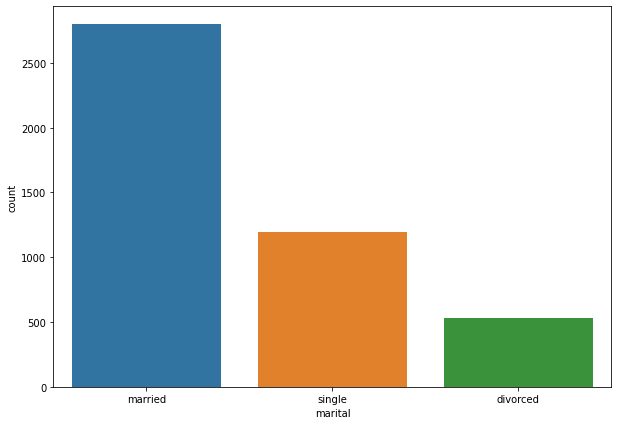

In [15]:
plt.figure(figsize = (10,7))
sns.countplot(x = data['marital'])

In [16]:
data['loan'].value_counts()

no     3830
yes     691
Name: loan, dtype: int64

<AxesSubplot: xlabel='loan', ylabel='count'>

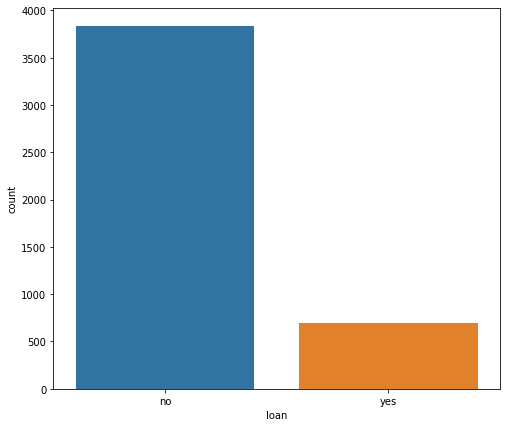

In [17]:
plt.figure(figsize = (8,7))
sns.countplot(x = data['loan'])

In [18]:
data['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

<AxesSubplot: xlabel='education', ylabel='count'>

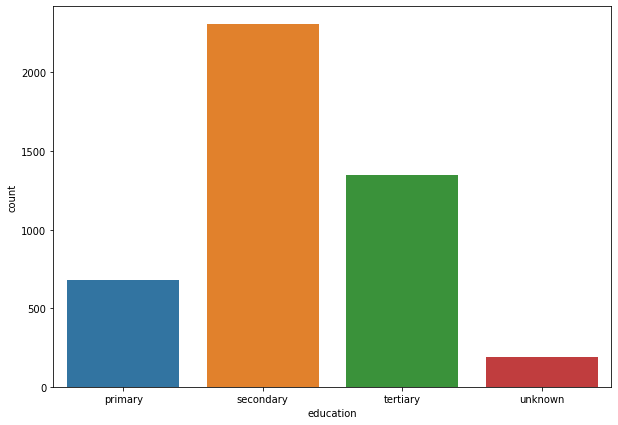

In [19]:
plt.figure(figsize = (10,7))
sns.countplot(x = data['education'])

<AxesSubplot: xlabel='age', ylabel='Count'>

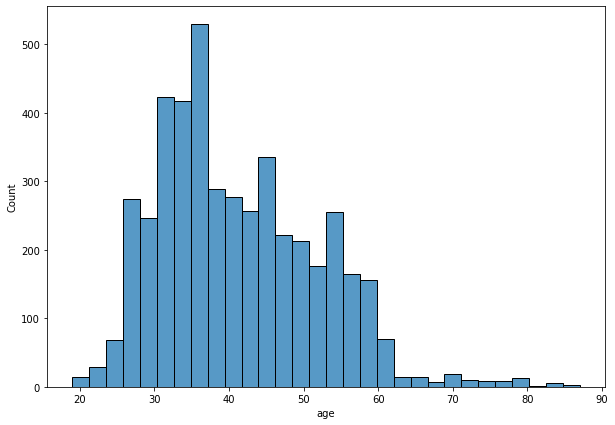

In [20]:
plt.figure(figsize=(10,7))
sns.histplot(x = data['age'],bins = 30)

<AxesSubplot: xlabel='balance', ylabel='Count'>

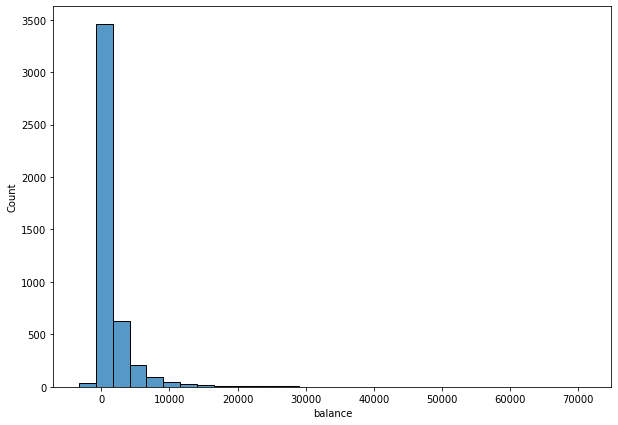

In [21]:
plt.figure(figsize = (10,7))
sns.histplot(x = data['balance'],bins = 30)

<AxesSubplot: xlabel='job', ylabel='count'>

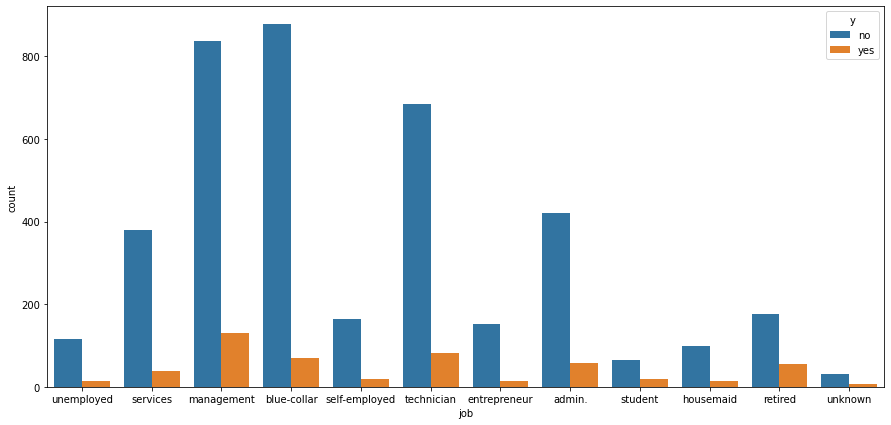

In [22]:
plt.figure(figsize = (15,7))
sns.countplot(x = data['job'],hue = 'y', data  =data)

<AxesSubplot: xlabel='marital', ylabel='count'>

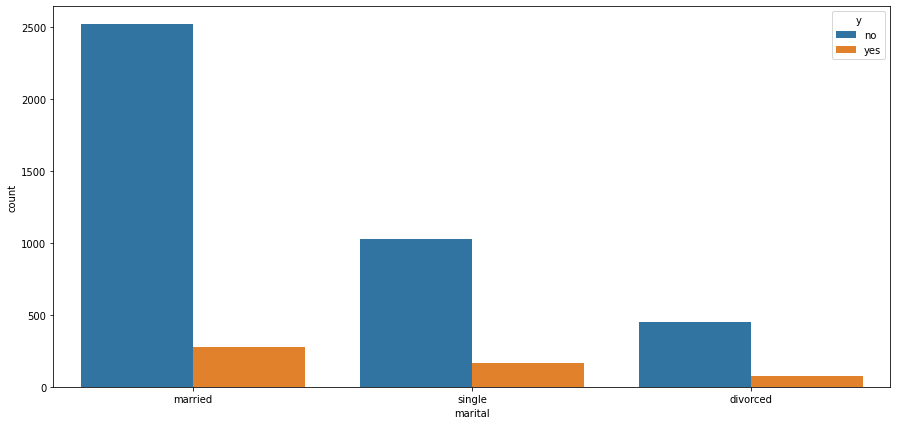

In [23]:
plt.figure(figsize = (15,7))
sns.countplot(x = data['marital'],hue = 'y', data  =data)

# Data Cleaning and Preapring for Model Building

In [24]:
data.drop(['education','contact','day','month','duration','previous'],axis = 1,inplace = True)

In [25]:
data

,age,job,marital,default,balance,housing,loan,campaign,pdays,poutcome,y
0,30,unemployed,married,no,1787,no,no,1,-1,unknown,no
1,33,services,married,no,4789,yes,yes,1,339,failure,no
2,35,management,single,no,1350,yes,no,1,330,failure,no
3,30,management,married,no,1476,yes,yes,4,-1,unknown,no
4,59,blue-collar,married,no,0,yes,no,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,no,-333,yes,no,5,-1,unknown,no
4517,57,self-employed,married,yes,-3313,yes,yes,1,-1,unknown,no
4518,57,technician,married,no,295,no,no,11,-1,unknown,no
4519,28,blue-collar,married,no,1137,no,no,4,211,other,no


In [26]:
data['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [27]:
dum1 = pd.get_dummies(data['job'])
data = pd.concat([data,dum1],axis = 1)
data

,age,job,marital,default,balance,housing,loan,campaign,pdays,poutcome,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,30,unemployed,married,no,1787,no,no,1,-1,unknown,...,0,0,0,0,0,0,0,0,1,0
1,33,services,married,no,4789,yes,yes,1,339,failure,...,0,0,0,0,0,1,0,0,0,0
2,35,management,single,no,1350,yes,no,1,330,failure,...,0,0,1,0,0,0,0,0,0,0
3,30,management,married,no,1476,yes,yes,4,-1,unknown,...,0,0,1,0,0,0,0,0,0,0
4,59,blue-collar,married,no,0,yes,no,1,-1,unknown,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,no,-333,yes,no,5,-1,unknown,...,0,0,0,0,0,1,0,0,0,0
4517,57,self-employed,married,yes,-3313,yes,yes,1,-1,unknown,...,0,0,0,0,1,0,0,0,0,0
4518,57,technician,married,no,295,no,no,11,-1,unknown,...,0,0,0,0,0,0,0,1,0,0
4519,28,blue-collar,married,no,1137,no,no,4,211,other,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [29]:
dum2 = pd.get_dummies(data['marital'])
data = pd.concat([data,dum2],axis = 1)
data

,age,job,marital,default,balance,housing,loan,campaign,pdays,poutcome,...,retired,self-employed,services,student,technician,unemployed,unknown,divorced,married,single
0,30,unemployed,married,no,1787,no,no,1,-1,unknown,...,0,0,0,0,0,1,0,0,1,0
1,33,services,married,no,4789,yes,yes,1,339,failure,...,0,0,1,0,0,0,0,0,1,0
2,35,management,single,no,1350,yes,no,1,330,failure,...,0,0,0,0,0,0,0,0,0,1
3,30,management,married,no,1476,yes,yes,4,-1,unknown,...,0,0,0,0,0,0,0,0,1,0
4,59,blue-collar,married,no,0,yes,no,1,-1,unknown,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,no,-333,yes,no,5,-1,unknown,...,0,0,1,0,0,0,0,0,1,0
4517,57,self-employed,married,yes,-3313,yes,yes,1,-1,unknown,...,0,1,0,0,0,0,0,0,1,0
4518,57,technician,married,no,295,no,no,11,-1,unknown,...,0,0,0,0,1,0,0,0,1,0
4519,28,blue-collar,married,no,1137,no,no,4,211,other,...,0,0,0,0,0,0,0,0,1,0


In [30]:
data.drop(['job','marital'],axis = 1 , inplace = True)
data

,age,default,balance,housing,loan,campaign,pdays,poutcome,y,admin.,...,retired,self-employed,services,student,technician,unemployed,unknown,divorced,married,single
0,30,no,1787,no,no,1,-1,unknown,no,0,...,0,0,0,0,0,1,0,0,1,0
1,33,no,4789,yes,yes,1,339,failure,no,0,...,0,0,1,0,0,0,0,0,1,0
2,35,no,1350,yes,no,1,330,failure,no,0,...,0,0,0,0,0,0,0,0,0,1
3,30,no,1476,yes,yes,4,-1,unknown,no,0,...,0,0,0,0,0,0,0,0,1,0
4,59,no,0,yes,no,1,-1,unknown,no,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,no,-333,yes,no,5,-1,unknown,no,0,...,0,0,1,0,0,0,0,0,1,0
4517,57,yes,-3313,yes,yes,1,-1,unknown,no,0,...,0,1,0,0,0,0,0,0,1,0
4518,57,no,295,no,no,11,-1,unknown,no,0,...,0,0,0,0,1,0,0,0,1,0
4519,28,no,1137,no,no,4,211,other,no,0,...,0,0,0,0,0,0,0,0,1,0


In [31]:
d = {'yes':1,'no':0}
data['default'] = data['default'].map(d)

In [32]:
d1 = {'yes':1,'no':0}
data['housing'] = data['housing'].map(d1)

In [33]:
d2 = {'yes':1,'no':0}
data['loan'] = data['loan'].map(d2)

In [34]:
data

,age,default,balance,housing,loan,campaign,pdays,poutcome,y,admin.,...,retired,self-employed,services,student,technician,unemployed,unknown,divorced,married,single
0,30,0,1787,0,0,1,-1,unknown,no,0,...,0,0,0,0,0,1,0,0,1,0
1,33,0,4789,1,1,1,339,failure,no,0,...,0,0,1,0,0,0,0,0,1,0
2,35,0,1350,1,0,1,330,failure,no,0,...,0,0,0,0,0,0,0,0,0,1
3,30,0,1476,1,1,4,-1,unknown,no,0,...,0,0,0,0,0,0,0,0,1,0
4,59,0,0,1,0,1,-1,unknown,no,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,5,-1,unknown,no,0,...,0,0,1,0,0,0,0,0,1,0
4517,57,1,-3313,1,1,1,-1,unknown,no,0,...,0,1,0,0,0,0,0,0,1,0
4518,57,0,295,0,0,11,-1,unknown,no,0,...,0,0,0,0,1,0,0,0,1,0
4519,28,0,1137,0,0,4,211,other,no,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
dum3 = pd.get_dummies(data['poutcome'])
data = pd.concat([data,dum3],axis =1)

In [36]:
data.drop(['poutcome'],axis = 1 ,inplace = True)

In [37]:
d = {'yes':1,'no':0}
data['y'] = data['y'].map(d)
data

,age,default,balance,housing,loan,campaign,pdays,y,admin.,blue-collar,...,technician,unemployed,unknown,divorced,married,single,failure,other,success,unknown
0,30,0,1787,0,0,1,-1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,33,0,4789,1,1,1,339,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,35,0,1350,1,0,1,330,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,30,0,1476,1,1,4,-1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,59,0,0,1,0,1,-1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,5,-1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4517,57,1,-3313,1,1,1,-1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4518,57,0,295,0,0,11,-1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4519,28,0,1137,0,0,4,211,0,0,1,...,0,0,0,0,1,0,0,1,0,0


# Model Building and Transform the Data

In [38]:
## Saving the data in X and y variables
X = data.drop(['y'],axis =1)
y = data['y']

In [42]:
## Transforming the data using Standard Scaler
from sklearn.preprocessing import StandardScaler

In [43]:
st = StandardScaler()

In [45]:
X_transform = st.fit_transform(X)

In [46]:
X_data = pd.DataFrame(X_transform,columns = X.columns)
X_data

,age,default,balance,housing,loan,campaign,pdays,admin.,blue-collar,entrepreneur,...,technician,unemployed,unknown,divorced,married,single,failure,other,success,unknown
0,-1.056270,-0.130759,0.121072,-1.142051,-0.424756,-0.576829,-0.407218,-0.343844,-0.514408,-0.196454,...,-0.452367,5.858354,-0.092068,-0.363636,0.785095,-0.599749,-0.348652,-0.213447,-0.171381,0.469300
1,-0.772583,-0.130759,1.118644,0.875617,2.354292,-0.576829,2.989044,-0.343844,-0.514408,-0.196454,...,-0.452367,-0.170696,-0.092068,-0.363636,0.785095,-0.599749,2.868193,-0.213447,-0.171381,-2.130831
2,-0.583458,-0.130759,-0.024144,0.875617,-0.424756,-0.576829,2.899143,-0.343844,-0.514408,-0.196454,...,-0.452367,-0.170696,-0.092068,-0.363636,-1.273731,1.667363,2.868193,-0.213447,-0.171381,-2.130831
3,-1.056270,-0.130759,0.017726,0.875617,2.354292,0.387967,-0.407218,-0.343844,-0.514408,-0.196454,...,-0.452367,-0.170696,-0.092068,-0.363636,0.785095,-0.599749,-0.348652,-0.213447,-0.171381,0.469300
4,1.686036,-0.130759,-0.472753,0.875617,-0.424756,-0.576829,-0.407218,-0.343844,1.943983,-0.196454,...,-0.452367,-0.170696,-0.092068,-0.363636,0.785095,-0.599749,-0.348652,-0.213447,-0.171381,0.469300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772583,-0.130759,-0.583410,0.875617,-0.424756,0.709566,-0.407218,-0.343844,-0.514408,-0.196454,...,-0.452367,-0.170696,-0.092068,-0.363636,0.785095,-0.599749,-0.348652,-0.213447,-0.171381,0.469300
4517,1.496912,7.647669,-1.573671,0.875617,2.354292,-0.576829,-0.407218,-0.343844,-0.514408,-0.196454,...,-0.452367,-0.170696,-0.092068,-0.363636,0.785095,-0.599749,-0.348652,-0.213447,-0.171381,0.469300
4518,1.496912,-0.130759,-0.374724,-1.142051,-0.424756,2.639160,-0.407218,-0.343844,-0.514408,-0.196454,...,2.210592,-0.170696,-0.092068,-0.363636,0.785095,-0.599749,-0.348652,-0.213447,-0.171381,0.469300
4519,-1.245394,-0.130759,-0.094925,-1.142051,-0.424756,0.387967,1.710451,-0.343844,1.943983,-0.196454,...,-0.452367,-0.170696,-0.092068,-0.363636,0.785095,-0.599749,-0.348652,4.685001,-0.171381,-2.130831


In [47]:
## Train and Test the Data for Prediction
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y,test_size = 0.20,random_state=1234)

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
log = LogisticRegression()

In [56]:
model_log_train = log.fit(X_train,y_train)
print("Model Traing Completed...Ready for Prediction.")

Model Traing Completed...Ready for Prediction.


In [64]:
y_pred1 = model_log_train.predict(X_test)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [79]:
log_ac1 = accuracy_score(y_test,y_pred1)*100
log_pc1 = precision_score(y_test,y_pred1)*100 
log_rs1 = recall_score(y_test,y_pred1)*100
log_fs1 =  f1_score(y_test,y_pred1)*100
log_roc_auc1 = roc_auc_score(y_test,y_pred1)*100

In [86]:
print("The Accuracy Score is",log_ac1,"%")
print("The Precision Score is",log_pc1,"%")
print("The Recall Score is",log_rs1,"%")
print("The f1 Score is",log_fs1,"%")
print("The Roc Auc Score is",log_roc_auc1,"%")

The Accuracy Score is 88.17679558011051 %
The Precision Score is 70.0 %
The Recall Score is 12.173913043478262 %
The f1 Score is 20.740740740740744 %
The Roc Auc Score is 55.70720968629609 %


# Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf = RandomForestClassifier()

In [89]:
rf_train = rf.fit(X_train,y_train)
print("Model Training Completed...Ready for Prediction.")

Model Training Completed...Ready for Prediction.


In [90]:
y_pred2 = rf_train.predict(X_test)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [91]:
log_ac2 = accuracy_score(y_test,y_pred2)*100
log_pc2 = precision_score(y_test,y_pred2)*100 
log_rs2 = recall_score(y_test,y_pred2)*100
log_fs2 =  f1_score(y_test,y_pred2)*100
log_roc_auc2 = roc_auc_score(y_test,y_pred2)*100

In [93]:
print("The Accuracy Score is",log_ac2,"%")
print("The Precision Score is",log_pc2,"%")
print("The Recall Score is",log_rs2,"%")
print("The f1 Score is",log_fs2,"%")
print("The Roc Auc Score is",log_roc_auc2,"%")

The Accuracy Score is 87.07182320441989 %
The Precision Score is 45.83333333333333 %
The Recall Score is 9.565217391304348 %
The f1 Score is 15.827338129496402 %
The Roc Auc Score is 53.95982388552558 %


# Gradient Boosting

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
gbc = GradientBoostingClassifier()

In [96]:
gbc_train = gbc.fit(X_train,y_train)
print("Model Training Completed...Ready for Prediction.")

Model Training Completed...Ready for Prediction.


In [97]:
y_pred3 = gbc_train.predict(X_test)
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [98]:
log_ac3 = accuracy_score(y_test,y_pred3)*100
log_pc3 = precision_score(y_test,y_pred3)*100 
log_rs3 = recall_score(y_test,y_pred3)*100
log_fs3 =  f1_score(y_test,y_pred3)*100
log_roc_auc3 = roc_auc_score(y_test,y_pred3)*100

In [99]:
print("The Accuracy Score is",log_ac3,"%")
print("The Precision Score is",log_pc3,"%")
print("The Recall Score is",log_rs3,"%")
print("The f1 Score is",log_fs3,"%")
print("The Roc Auc Score is",log_roc_auc3,"%")

The Accuracy Score is 86.85082872928177 %
The Precision Score is 43.75 %
The Recall Score is 12.173913043478262 %
The f1 Score is 19.04761904761905 %
The Roc Auc Score is 54.94771601541001 %


In [100]:
 final_data = pd.DataFrame({'Model':['LR','RF','GBC'],
             'ACC':[accuracy_score(y_test,y_pred1)*100,
                    accuracy_score(y_test,y_pred2)*100,
                    accuracy_score(y_test,y_pred3)*100
                   ]})

In [101]:
final_data

,Model,ACC
0,LR,88.176796
1,RF,87.071823
2,GBC,86.850829


<AxesSubplot: xlabel='Model', ylabel='ACC'>

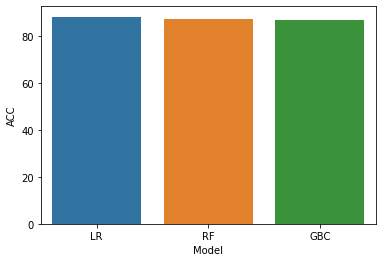

In [102]:
sns.barplot( x = final_data['Model'],y = final_data['ACC'])

# As we found, Logistic Regression is the best fit Model for the prediction.

# Lets Save the Best Model

In [106]:
model_log = LogisticRegression()
model_log_train = log.fit(X_train,y_train)
y_pred1 = model_log_train.predict(X_test)

In [107]:
import pickle  

In [108]:
pickle.dump(model_log,open('model_log.pkl', 'wb'))

In [110]:
#### Loading the Model for Prdicting
file = open("model_log.pkl",'rb')
object_file = pickle.load(file)
object_file

LogisticRegression()

# END.